In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

In [2]:
df = pd.read_csv('triples.csv')
df

,head,tail,relation,label
0,关羽,刘备,younger_sworn_brother,义弟
1,张飞,刘备,younger_sworn_brother,义弟
2,关羽,张飞,elder_sworn_brother,义兄
3,张苞,张飞,son,儿子
4,关兴,关羽,son,儿子
...,...,...,...,...
148,曹植,曹丕,younger_brother,弟弟
149,马谡,诸葛亮,colleague,同事
150,马谡,刘备,minister,臣
151,孙坚,孙权,father,父亲


### 通过连接表Edge List 创建图

In [4]:
## 提取Head列和tail列建立连接
G = nx.DiGraph()
edges =[edge for edge in zip(df['head'],df['tail'])]
G.add_edges_from(edges)

In [5]:
## 查看关羽的连接
G.edges('关羽')

OutEdgeDataView([('关羽', '刘备'), ('关羽', '张飞')])

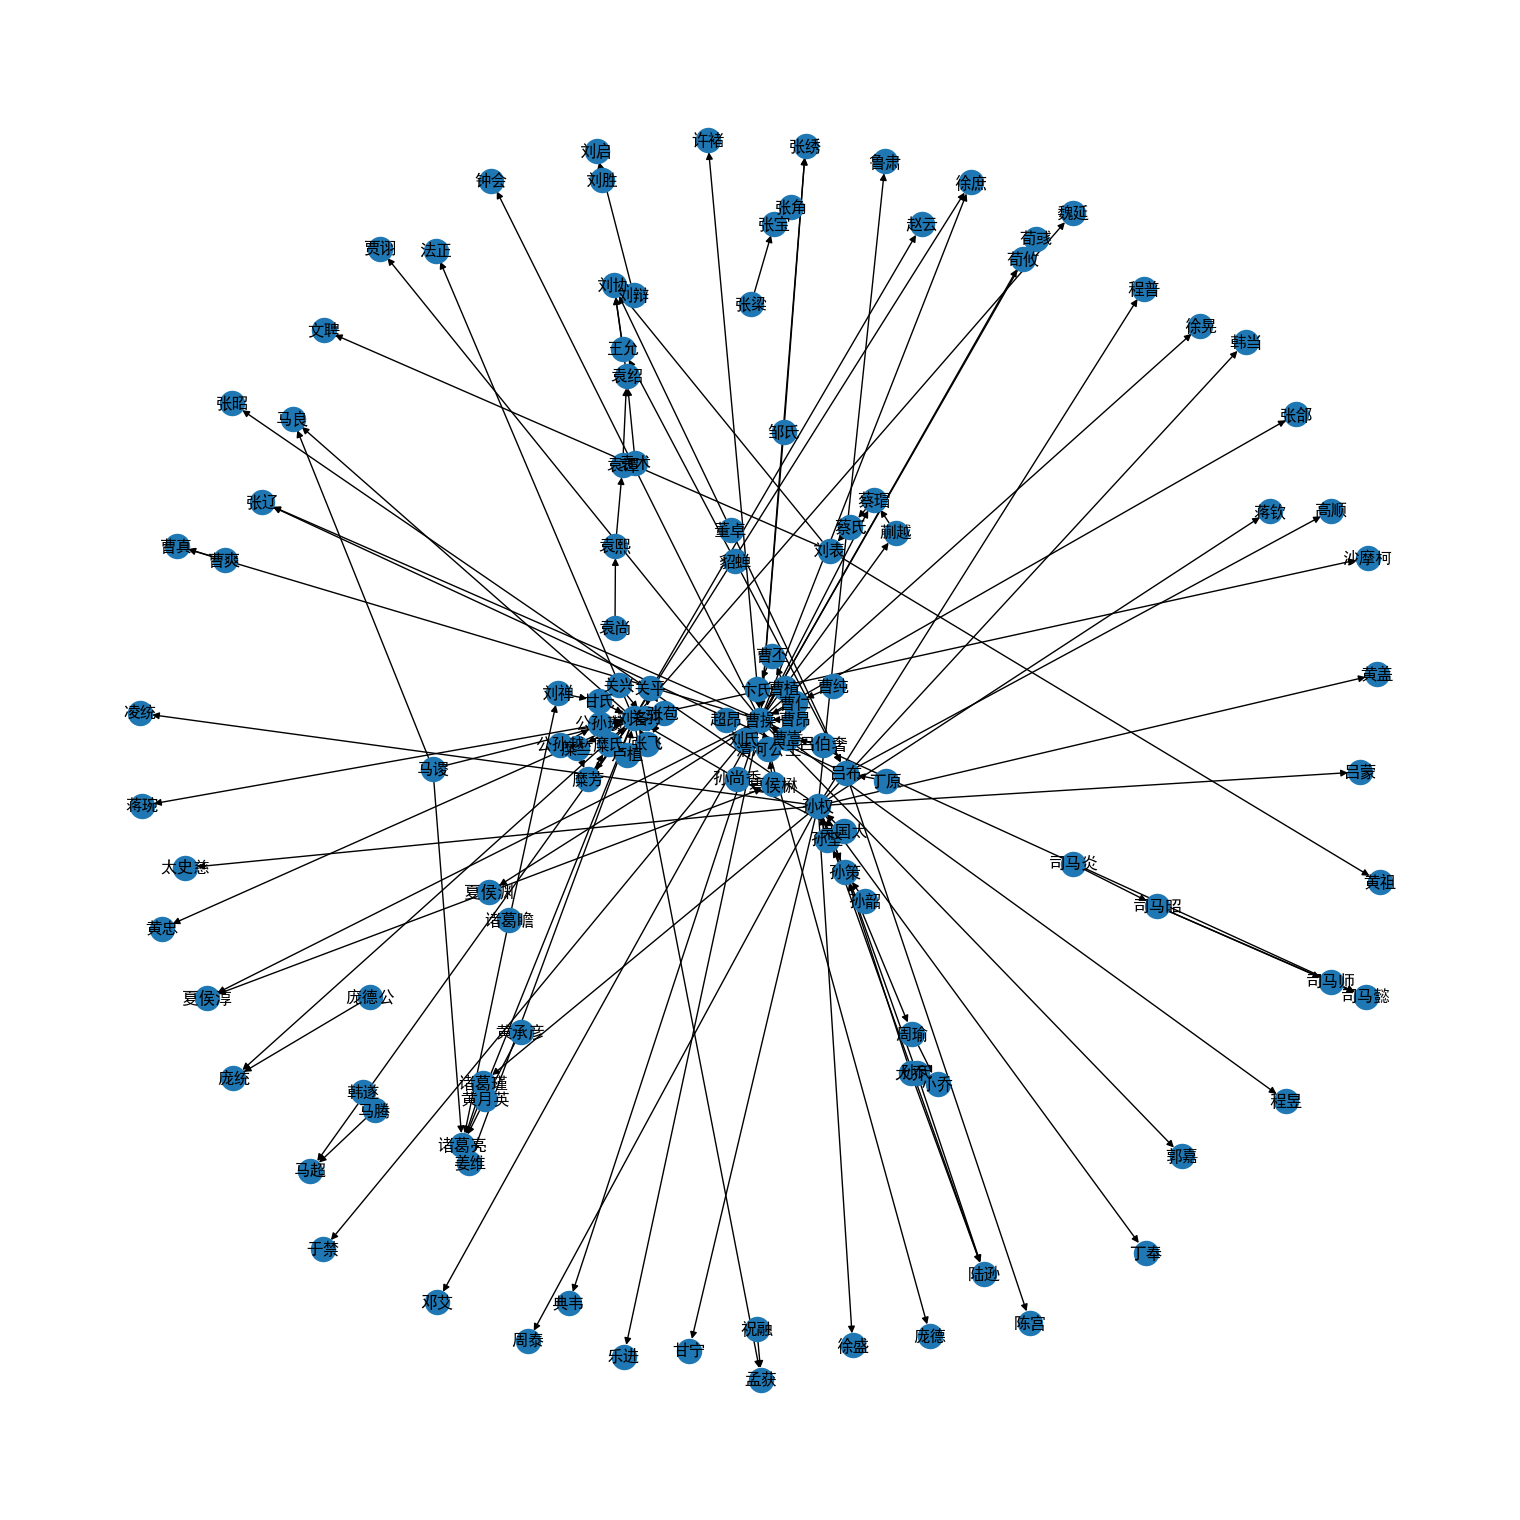

In [6]:
## 可视化
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G,seed = 10) # 绘制图时可以先生成布局，例如spring_layout弹簧布局,设置随机种子就可以完全复现
nx.draw(G,pos,with_labels=True)

### 查看全图参数

In [7]:
print(G)

DiGraph with 123 nodes and 144 edges


In [8]:
len(G)

123

In [9]:
G.size()

144

In [10]:
G.nodes

NodeView(('关羽', '刘备', '张飞', '张苞', '关兴', '关平', '卢植', '公孙瓒', '甘氏', '刘禅', '诸葛瞻', '诸葛亮', '姜维', '黄月英', '黄承彦', '诸葛瑾', '公孙越', '马超', '马腾', '韩遂', '徐庶', '曹操', '刘胜', '刘启', '刘辩', '孙权', '孙尚香', '糜氏', '糜芳', '糜竺', '魏延', '赵云', '黄忠', '庞统', '法正', '蒋琬', '马良', '孟获', '沙摩柯', '庞德公', '马谡', '祝融', '孙韶', '孙策', '孙氏', '陆逊', '刘协', '董卓', '王允', '貂蝉', '吕布', '丁原', '高顺', '陈宫', '张辽', '刘表', '蔡氏', '蔡瑁', '蒯越', '黄祖', '文聘', '张宝', '张角', '张梁', '袁绍', '袁术', '袁谭', '袁熙', '袁尚', '吴国太', '孙坚', '大乔', '小乔', '周瑜', '丁奉', '徐盛', '鲁肃', '张昭', '蒋钦', '太史慈', '周泰', '凌统', '吕蒙', '甘宁', '黄盖', '韩当', '程普', '曹嵩', '吕伯奢', '邹氏', '张绣', '清河公主', '夏侯楙', '夏侯渊', '夏侯淳', '曹真', '曹爽', '郭嘉', '徐晃', '乐进', '张郃', '许褚', '典韦', '荀彧', '荀攸', '贾诩', '司马懿', '程昱', '于禁', '邓艾', '钟会', '庞德', '司马师', '司马昭', '司马炎', '曹仁', '曹纯', '曹昂', '刘氏', '超昂', '卞氏', '曹丕', '曹植'))

In [11]:
G.edges

OutEdgeView([('关羽', '刘备'), ('关羽', '张飞'), ('刘备', '诸葛亮'), ('刘备', '马超'), ('刘备', '徐庶'), ('刘备', '姜维'), ('刘备', '糜芳'), ('刘备', '糜竺'), ('刘备', '魏延'), ('刘备', '赵云'), ('刘备', '黄忠'), ('刘备', '庞统'), ('刘备', '法正'), ('刘备', '蒋琬'), ('刘备', '马良'), ('刘备', '孟获'), ('刘备', '沙摩柯'), ('张飞', '刘备'), ('张苞', '张飞'), ('关兴', '关羽'), ('关平', '张苞'), ('关平', '关羽'), ('卢植', '刘备'), ('公孙瓒', '刘备'), ('甘氏', '刘备'), ('刘禅', '甘氏'), ('诸葛瞻', '刘禅'), ('诸葛瞻', '诸葛亮'), ('诸葛亮', '姜维'), ('姜维', '诸葛亮'), ('黄月英', '诸葛亮'), ('黄承彦', '黄月英'), ('诸葛瑾', '诸葛亮'), ('公孙越', '公孙瓒'), ('马腾', '马超'), ('韩遂', '马腾'), ('曹操', '徐庶'), ('曹操', '张辽'), ('曹操', '蒯越'), ('曹操', '蔡瑁'), ('曹操', '张绣'), ('曹操', '夏侯淳'), ('曹操', '夏侯渊'), ('曹操', '曹真'), ('曹操', '郭嘉'), ('曹操', '徐晃'), ('曹操', '乐进'), ('曹操', '张郃'), ('曹操', '许褚'), ('曹操', '典韦'), ('曹操', '荀彧'), ('曹操', '荀攸'), ('曹操', '贾诩'), ('曹操', '司马懿'), ('曹操', '程昱'), ('曹操', '于禁'), ('曹操', '邓艾'), ('曹操', '钟会'), ('曹操', '庞德'), ('刘胜', '刘启'), ('刘辩', '刘启'), ('孙权', '诸葛瑾'), ('孙权', '孙策'), ('孙权', '周瑜'), ('孙权', '陆逊'), ('孙权', '丁奉'), ('孙权', '徐盛'), ('孙权', '鲁肃'), ('孙权', '张昭'), (

### 保持并载入邻接表Adjacency List

In [12]:
for line in nx.generate_adjlist(G):
    print(line)

关羽 刘备 张飞
刘备 诸葛亮 马超 徐庶 姜维 糜芳 糜竺 魏延 赵云 黄忠 庞统 法正 蒋琬 马良 孟获 沙摩柯
张飞 刘备
张苞 张飞
关兴 关羽
关平 张苞 关羽
卢植 刘备
公孙瓒 刘备
甘氏 刘备
刘禅 甘氏
诸葛瞻 刘禅 诸葛亮
诸葛亮 姜维
姜维 诸葛亮
黄月英 诸葛亮
黄承彦 黄月英
诸葛瑾 诸葛亮
公孙越 公孙瓒
马超
马腾 马超
韩遂 马腾
徐庶
曹操 徐庶 张辽 蒯越 蔡瑁 张绣 夏侯淳 夏侯渊 曹真 郭嘉 徐晃 乐进 张郃 许褚 典韦 荀彧 荀攸 贾诩 司马懿 程昱 于禁 邓艾 钟会 庞德
刘胜 刘启
刘启
刘辩 刘启
孙权 诸葛瑾 孙策 周瑜 陆逊 丁奉 徐盛 鲁肃 张昭 蒋钦 太史慈 周泰 凌统 吕蒙 甘宁 黄盖 韩当 程普
孙尚香 刘备 吴国太
糜氏 刘备
糜芳 糜氏
糜竺 糜芳
魏延
赵云
黄忠
庞统
法正
蒋琬
马良
孟获
沙摩柯
庞德公 庞统
马谡 马良 诸葛亮 刘备
祝融 孟获
孙韶 孙策
孙策 孙坚
孙氏 陆逊 孙策
陆逊
刘协 刘辩
董卓 刘协 吕布
王允 刘协
貂蝉 王允 吕布
吕布 高顺 陈宫 张辽
丁原 吕布
高顺
陈宫
张辽
刘表 刘协 黄祖 文聘
蔡氏 刘表
蔡瑁 蔡氏
蒯越 蔡瑁
黄祖
文聘
张宝 张角
张角
张梁 张宝
袁绍 刘协
袁术 袁绍
袁谭 袁绍
袁熙 袁谭
袁尚 袁熙
吴国太 孙坚 孙权
孙坚 孙权
大乔 孙策 陆逊
小乔 大乔
周瑜 小乔
丁奉
徐盛
鲁肃
张昭
蒋钦
太史慈
周泰
凌统
吕蒙
甘宁
黄盖
韩当
程普
曹嵩 曹操
吕伯奢 曹嵩
邹氏 曹操 张绣
张绣
清河公主 曹操
夏侯楙 清河公主
夏侯渊 夏侯楙 夏侯淳
夏侯淳
曹真
曹爽 曹真
郭嘉
徐晃
乐进
张郃
许褚
典韦
荀彧 荀攸
荀攸
贾诩
司马懿
程昱
于禁
邓艾
钟会
庞德
司马师 司马懿
司马昭 司马师 司马懿
司马炎 司马昭
曹仁 曹操
曹纯 曹仁
曹昂 曹操
刘氏 曹操
超昂 刘氏
卞氏 曹操
曹丕 卞氏
曹植 曹丕


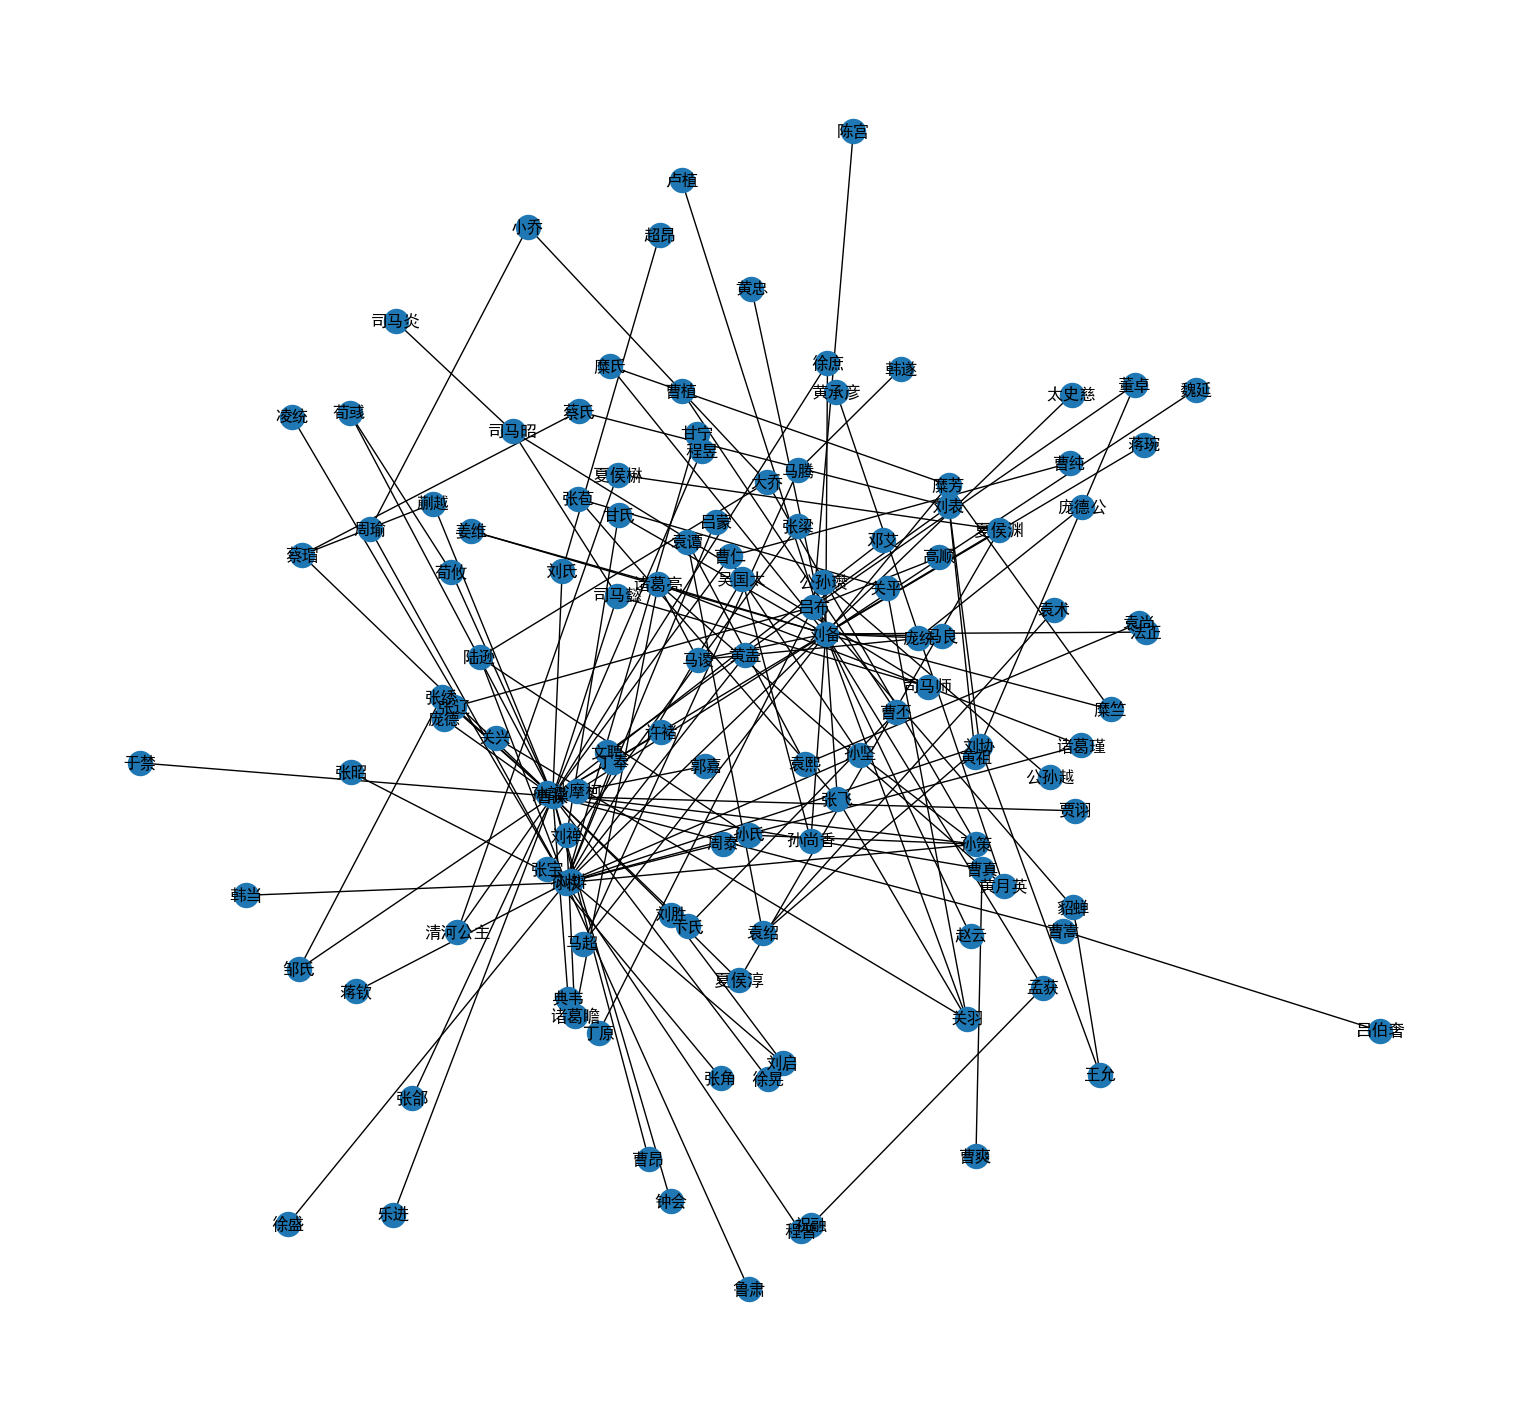

In [13]:
## 将邻接表导出为本地文件grid.edgelist
nx.write_edgelist(G,path='grid.edgelist',delimiter=":")
## 从本地文件grid.edgelist读取邻接表
H = nx.read_edgelist(path='grid.edgelist',delimiter=":")
## 可视化
plt.figure(figsize=(15,14))
pos = nx.spring_layout(H,iterations=3,seed = 10) # 绘制图时可以先生成布局，例如spring_layout弹簧布局,设置随机种子就可以完全复现
nx.draw(H,pos,with_labels=True)